# Classification

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

import pickle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale,StandardScaler,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
from sklearn import linear_model
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from matplotlib.legend_handler import HandlerLine2D



np.random.seed(54)


In [11]:
os.listdir('Data')

['df_day.csv',
 'df_hour.csv',
 'btc',
 '.DS_Store',
 'bitcoin_2.csv',
 'cleaned_bitcoin_upto_2022-08-10.csv',
 'classification_model_scores.sav',
 'bitcoin_10.csv',
 'cluster_data_files',
 'bitcoin_13.csv',
 'bitcoin_16.csv',
 '.ipynb_checkpoints',
 'eth',
 'df_min_post_clustering.csv',
 'bitcoin.csv',
 'bitcoin_merged.csv',
 'df_minute.csv']

In [12]:
df = pd.read_csv('Data/df_min_post_clustering.csv')
df = df.set_index('date').drop('Unnamed: 0',axis = 1)
subset_columns = ['percent_change', 
                  'volume','n_trades',
                  'compound_avg','nTweets','nlikes','nreplies','nretweets']


In [13]:
df.columns

Index(['open', 'close', 'low', 'high', 'volume', 'n_trades', 'compound_avg',
       'compound_scaled_avg', 'price_change', 'percent_change', 'code',
       'nTweets', 'nlikes', 'nreplies', 'nretweets', 'k_means_clusters',
       'hier_clusters', 'db_clusters'],
      dtype='object')

In [58]:
def prep_data(df,subset_cols,target_col,model):
    
    buy = False
    sell = True
    df_subset = df[subset_cols]
    df_subset['response'] = np.where(df_subset.copy()[target_col] > 0,sell,buy) 
    print(df_subset['response'].value_counts())
    
    x_col = df_subset.columns[1:-4]
    y_col = df_subset.columns[-1:]
    X = df_subset[x_col]
    y = np.array(df_subset['response'])
    
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.3) 
    
    
    if model == 'logistic':
        scaler = MinMaxScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    if model == 'knn':
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    


    return X_train, X_test, y_train, y_test,y,X, df_subset

## kNN

In [59]:
X_train, X_test, y_train, y_test,y,X,df_subset = prep_data(df,subset_columns,'percent_change','knn')

False    7218
True     5742
Name: response, dtype: int64


/var/folders/bx/98s7l1y96p1f_2n55v3g_3dc0000gn/T/ipykernel_35733/2953734480.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['response'] = np.where(df_subset.copy()[target_col] > 0,sell,buy)


In [60]:
np.unique(y_test, return_counts=True)

(array([False,  True]), array([2144, 1744]))

In [61]:
kNN_dict = {}
for x in range(1,101):
    kNN = KNeighborsClassifier(n_neighbors = x)
    # Fit the classifier to the data.
    kNN.fit(X_train, y_train)
    predictions = kNN.predict(X_test)
    #actual_v_predicted = np.column_stack((y_test, predictions))
    cm_kNN = confusion_matrix(y_test, predictions)
    #print(cm_kNN)
    print(x,round(accuracy_score(y_test, predictions), 4))
    kNN_dict[x] = round(accuracy_score(y_test, predictions), 4)

1 0.5121
2 0.5329
3 0.5093
4 0.5324
5 0.51
6 0.5285
7 0.5201
8 0.536
9 0.5242
10 0.5316
11 0.5147
12 0.5314
13 0.519
14 0.5285
15 0.5221
16 0.5373
17 0.5219
18 0.5347
19 0.5358
20 0.537
21 0.5278
22 0.5329
23 0.5298
24 0.5332
25 0.5262
26 0.535
27 0.5283
28 0.534
29 0.526
30 0.5311
31 0.5249
32 0.5368
33 0.5275
34 0.5332
35 0.5316
36 0.5394
37 0.5311
38 0.5406
39 0.5322
40 0.5386
41 0.5319
42 0.5399
43 0.5327
44 0.534
45 0.5291
46 0.5401
47 0.5399
48 0.5404
49 0.5406
50 0.5381
51 0.5412
52 0.5453
53 0.546
54 0.5509
55 0.5466
56 0.545
57 0.5466
58 0.5445
59 0.5427
60 0.5417
61 0.544
62 0.5473
63 0.5476
64 0.5484
65 0.5491
66 0.5499
67 0.5489
68 0.5486
69 0.5471
70 0.5494
71 0.5496
72 0.5535
73 0.5481
74 0.554
75 0.5491
76 0.5484
77 0.5458
78 0.5507
79 0.5507
80 0.5484
81 0.552
82 0.5481
83 0.5494
84 0.5494
85 0.5502
86 0.5502
87 0.5499
88 0.5502
89 0.5496
90 0.5525
91 0.5509
92 0.554
93 0.5522
94 0.5527
95 0.5522
96 0.552
97 0.5517
98 0.554
99 0.5509
100 0.5512


In [62]:
max_key = max(kNN_dict, key = kNN_dict.get)
max_key

74

In [63]:
kNN = KNeighborsClassifier(n_neighbors = max_key)
# Fit the classifier to the data.
kNN.fit(X_train, y_train)
predictions = kNN.predict(X_test)
#actual_v_predicted = np.column_stack((y_test, predictions))
cm_kNN = confusion_matrix(y_test, predictions)
#print(cm_kNN)
print(max_key,round(accuracy_score(y_test, predictions), 4))
#kNN_dict[x] = round(accuracy_score(y_test, predictions), 4)

74 0.554


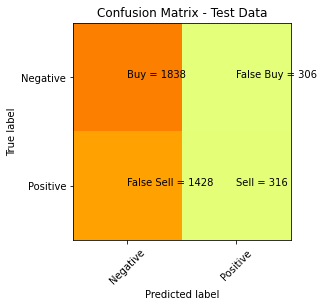

In [64]:
plt.imshow(cm_kNN, interpolation = 'nearest', cmap = plt.cm.Wistia)
#classNames = ['Buy', 'Sell']
classNames = ['Negative', 'Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation = 45)
plt.yticks(tick_marks, classNames)
#s = [['TN', 'FP'], ['FN', 'TP']]
s = [['Buy', 'False Buy'], ['False Sell', 'Sell']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j]) + " = " + str(cm_kNN[i][j]))
plt.show()

In [65]:
# Create a dictionary with accuracy values for our kNN model with k.
model_final_dict = {'metrics': ["accuracy"],
                    'values':[round(accuracy_score(y_test, predictions), 4)],
                    'model':['kNN_k']}
model_final = pd.DataFrame(data = model_final_dict)
print(model_final)




    metrics  values  model
0  accuracy   0.554  kNN_k


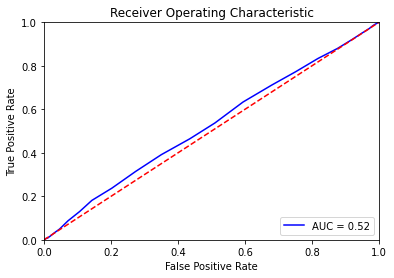

In [66]:
# Store FPR, TPR, and threshold as variables.
fpr, tpr, threshold = metrics.roc_curve(y_test, kNN.predict_proba(X_test)[:,1])
# Store the AUC.
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################


In [67]:
cv_pipeline = Pipeline([('transformer',  StandardScaler()), ('estimator', kNN)])
cv_scores = cross_val_score(cv_pipeline, X, y, cv = 5)
print("cv_scores mean:{}".format(np.mean(cv_scores)))
mean = np.mean(cv_scores)
print("Optimal cv score is:", round(mean, 4))

cv_scores mean:0.5338734567901234
Optimal cv score is: 0.5339


In [71]:
k_range = list(range(1, 21))
param_grid = dict(n_neighbors = k_range)
print(param_grid)
grid = GridSearchCV(kNN, param_grid, cv = 10, scoring = 'recall')
grid_search_pipeline = Pipeline([('transformer',  StandardScaler()), ('estimator', grid)])

# Fit Gridsearch pipeline
grid_search_pipeline.fit(X_train, y_train)





{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}


Pipeline(steps=[('transformer', StandardScaler()),
                ('estimator',
                 GridSearchCV(cv=10,
                              estimator=KNeighborsClassifier(n_neighbors=74),
                              param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7,
                                                          8, 9, 10, 11, 12, 13,
                                                          14, 15, 16, 17, 18,
                                                          19, 20]},
                              scoring='recall'))])

In [72]:
print(grid.cv_results_['mean_test_score'])


[0.4519718  0.20159774 0.41921742 0.2473797  0.40946554 0.25538534
 0.38395113 0.25413095 0.36218296 0.24762343 0.35394048 0.2491203
 0.33567231 0.25012531 0.32566541 0.24186842 0.32166479 0.24412343
 0.31091165 0.23662281]


[0.4519718045112782, 0.20159774436090222, 0.4192174185463659, 0.2473796992481203, 0.4094655388471177, 0.2553853383458647, 0.3839511278195489, 0.2541309523809524, 0.3621829573934837, 0.2476234335839599, 0.3539404761904762, 0.24912030075187971, 0.335672305764411, 0.25012531328320803, 0.3256654135338346, 0.24186842105263157, 0.3216647869674185, 0.24412343358395994, 0.31091165413533833, 0.23662280701754385]


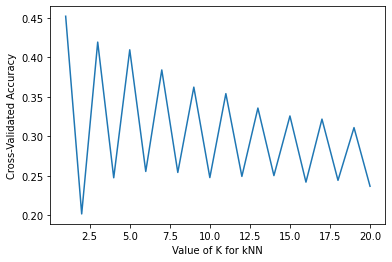

In [73]:
grid_mean_scores = [result for result in grid.cv_results_['mean_test_score']]
print(grid_mean_scores)
_ = plt.plot(k_range, grid_mean_scores)
_ = plt.xlabel('Value of K for kNN')
_ = plt.ylabel('Cross-Validated Accuracy')
plt.show()


In [74]:
# Single best score achieved across all params (k).
print(grid.best_score_)
grid_score = grid.best_score_

# Dictionary containing the parameters (k) used to generate that score.
print(grid.best_params_)

# Actual model object fit with those best parameters.
# Shows default parameters that we did not specify.
print(grid.best_estimator_)




0.4519718045112782
{'n_neighbors': 1}
KNeighborsClassifier(n_neighbors=1)


In [75]:
model_final

,metrics,values,model
0,accuracy,0.554,kNN_k


In [76]:
model_final = model_final.append({'metrics' : "accuracy" , 
                                  'values' : round(grid_score, 4),
                                  'model':'kNN_GridSearchCV' } , 
                                  ignore_index = True)
print(model_final)




    metrics  values             model
0  accuracy   0.554             kNN_k
1  accuracy   0.452  kNN_GridSearchCV


/var/folders/bx/98s7l1y96p1f_2n55v3g_3dc0000gn/T/ipykernel_35733/3161759597.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_final = model_final.append({'metrics' : "accuracy" ,


In [77]:
kNN_best = grid.best_estimator_

# Check accuracy of our model on the test data.
print(kNN_best.score(X_test, y_test))
kNN_champ = kNN_best.score(X_test, y_test)

model_final = model_final.append({'metrics' : "accuracy" , 
                                  'values' : round(kNN_champ, 4),
                                  'model':'kNN_optimized' },
                                ignore_index = True)
print(model_final)





0.5120884773662552
    metrics  values             model
0  accuracy  0.5540             kNN_k
1  accuracy  0.4520  kNN_GridSearchCV
2  accuracy  0.5121     kNN_optimized


/var/folders/bx/98s7l1y96p1f_2n55v3g_3dc0000gn/T/ipykernel_35733/2094344796.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_final = model_final.append({'metrics' : "accuracy" ,


In [78]:
X_train, X_test, y_train, y_test,y,X,df_subset = prep_data(df,subset_columns,'percent_change','logistic')

False    7218
True     5742
Name: response, dtype: int64


/var/folders/bx/98s7l1y96p1f_2n55v3g_3dc0000gn/T/ipykernel_35733/2953734480.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['response'] = np.where(df_subset.copy()[target_col] > 0,sell,buy)


In [21]:
logistic_regression_model = linear_model.LogisticRegression()
logistic_regression_model.fit(X_train, 
                              y_train)

predicted_values = logistic_regression_model.predict(X_test)

conf_matrix_test = metrics.confusion_matrix(y_test, predicted_values)
print(conf_matrix_test)
# Compute test model accuracy score.
test_accuracy_score = metrics.accuracy_score(y_test, predicted_values)
print("Accuracy on test data: ", test_accuracy_score)

[[2087   44]
 [1713   44]]
Accuracy on test data:  0.54809670781893


In [22]:
# Create a list of target names to interpret class assignments.
target_names = df_subset['response'].unique()
target_names=target_names.tolist()
target_names = [str(x) for x in target_names]
# Print an entire classification report.
class_report = metrics.classification_report(y_test, 
                                             predicted_values, 
                                             target_names = target_names)
print(class_report)

model_final = model_final.append({'metrics' : "accuracy" , 
                'values' : round(test_accuracy_score,4),
                'model':'logistic' },ignore_index = True)
print(model_final)

              precision    recall  f1-score   support

       False       0.55      0.98      0.70      2131
        True       0.50      0.03      0.05      1757

    accuracy                           0.55      3888
   macro avg       0.52      0.50      0.38      3888
weighted avg       0.53      0.55      0.41      3888

    metrics  values             model
0  accuracy  0.5437             kNN_k
1  accuracy  0.4315  kNN_GridSearchCV
2  accuracy  1.0000     kNN_optimized
3  accuracy  0.5481          logistic


/var/folders/bx/98s7l1y96p1f_2n55v3g_3dc0000gn/T/ipykernel_35733/3825435482.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_final = model_final.append({'metrics' : "accuracy" ,


In [23]:
# Get probabilities instead of predicted values.
test_probabilities = logistic_regression_model.predict_proba(X_test)
print(test_probabilities[0:5, :])
# Get probabilities of test predictions only.
test_predictions = test_probabilities[:, 1]
print(test_predictions[0:5])


[[0.5788391  0.4211609 ]
 [0.57566339 0.42433661]
 [0.56574409 0.43425591]
 [0.56425603 0.43574397]
 [0.52403659 0.47596341]]
[0.4211609  0.42433661 0.43425591 0.43574397 0.47596341]


In [24]:
fpr, tpr, threshold = metrics.roc_curve(y_test,            #<- test data labels
                                        test_predictions)  #<- predicted probabilities
print("False positive: ", fpr[:5])
print("True positive: ", tpr[:5])
print("Threshold: ", threshold[:5])

auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve: ", auc)

False positive:  [0.         0.00046926 0.00093853 0.00093853 0.00422337]
True positive:  [0.        0.        0.        0.0011383 0.0011383]
Threshold:  [1.63876352 0.63876352 0.63828967 0.60367363 0.57381081]
Area under the ROC curve:  0.5403995067527704


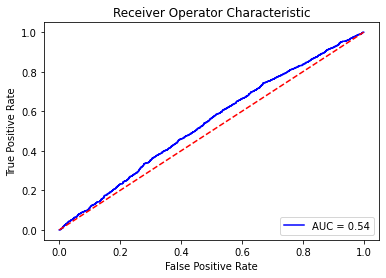

In [25]:
# Make an ROC curve plot.
plt.title('Receiver Operator Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [26]:
trained_accuracy_score = logistic_regression_model.score(X_train, y_train)
print("Accuracy on train data: " , trained_accuracy_score)

# Create regularization penalty space.
penalty = ['l1', 'l2']
# Create regularization constant space.
C = np.logspace(0, 10, 10)
print("Regularization constant: ", C)
# Create hyperparameter options dictionary.
hyperparameters = dict(C = C, penalty = penalty)
print(hyperparameters)


clf = GridSearchCV(linear_model.LogisticRegression(solver='saga',
                                                   max_iter = 10000),
                                                   #,n_jobs = -1), #<- function to optimize
                   hyperparameters,                   #<- grid search parameters
                   cv = 25,                           #<- 10-fold cv
                   verbose = 2)                       #<- no messages to show
# Fit CV grid search.
best_model = clf.fit(X_train, y_train)
best_model


Accuracy on train data:  0.5602954144620811
Regularization constant:  [1.00000000e+00 1.29154967e+01 1.66810054e+02 2.15443469e+03
 2.78255940e+04 3.59381366e+05 4.64158883e+06 5.99484250e+07
 7.74263683e+08 1.00000000e+10]
{'C': array([1.00000000e+00, 1.29154967e+01, 1.66810054e+02, 2.15443469e+03,
       2.78255940e+04, 3.59381366e+05, 4.64158883e+06, 5.99484250e+07,
       7.74263683e+08, 1.00000000e+10]), 'penalty': ['l1', 'l2']}
Fitting 25 folds for each of 20 candidates, totalling 500 fits
[CV] END ..................................C=1.0, penalty=l1; total time=   0.1s
[CV] END ..................................C=1.0, penalty=l1; total time=   0.1s
[CV] END ..................................C=1.0, penalty=l1; total time=   0.1s
[CV] END ..................................C=1.0, penalty=l1; total time=   0.1s
[CV] END ..................................C=1.0, penalty=l1; total time=   0.1s
[CV] END ..................................C=1.0, penalty=l1; total time=   0.1s
[CV] END ....

GridSearchCV(cv=25, estimator=LogisticRegression(max_iter=10000, solver='saga'),
             param_grid={'C': array([1.00000000e+00, 1.29154967e+01, 1.66810054e+02, 2.15443469e+03,
       2.78255940e+04, 3.59381366e+05, 4.64158883e+06, 5.99484250e+07,
       7.74263683e+08, 1.00000000e+10]),
                         'penalty': ['l1', 'l2']},
             verbose=2)

In [27]:
penalty = best_model.best_estimator_.get_params()['penalty']
constant = best_model.best_estimator_.get_params()['C']
print('Best penalty: ', penalty)
print('Best C: ', constant)

best_predicted_values = best_model.predict(X_test)
print(best_predicted_values)
# Compute best model accuracy score.
best_accuracy_score = metrics.accuracy_score(y_test, best_predicted_values)
print("Accuracy on test data (best model): ", best_accuracy_score)


trained_accuracy_score = best_model.score(X_train, y_train)
print("Accuracy on train data: " , trained_accuracy_score)

Best penalty:  l1
Best C:  12.91549665014884
[False False False ... False False False]
Accuracy on test data (best model):  0.5498971193415638
Accuracy on train data:  0.5600749559082893


In [28]:
# Compute confusion matrix for best model.
best_confusion_matrix = metrics.confusion_matrix(y_test, best_predicted_values)
print(best_confusion_matrix)
# Create a list of target names to interpret class assignments.
target_names = ['Buy', 'Sell']
# Compute classification report for best model.
best_class_report = metrics.classification_report(y_test, best_predicted_values, 
                                                  target_names = target_names)
print(best_class_report)


[[2080   51]
 [1699   58]]
              precision    recall  f1-score   support

         Buy       0.55      0.98      0.70      2131
        Sell       0.53      0.03      0.06      1757

    accuracy                           0.55      3888
   macro avg       0.54      0.50      0.38      3888
weighted avg       0.54      0.55      0.41      3888



In [29]:
model_final = model_final.append({'metrics' : "accuracy", 
                                  'values' : round(best_accuracy_score, 4),
                                  'model':'logistic_tuned' },ignore_index = True)
print(model_final)


    metrics  values             model
0  accuracy  0.5437             kNN_k
1  accuracy  0.4315  kNN_GridSearchCV
2  accuracy  1.0000     kNN_optimized
3  accuracy  0.5481          logistic
4  accuracy  0.5499    logistic_tuned


/var/folders/bx/98s7l1y96p1f_2n55v3g_3dc0000gn/T/ipykernel_35733/747231987.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_final = model_final.append({'metrics' : "accuracy",


In [30]:
# Get probabilities instead of predicted values.
best_test_probabilities = best_model.predict_proba(X_test)
print(best_test_probabilities[0:5, ])
# Get probabilities of test predictions only.
best_test_predictions = best_test_probabilities[:, 1]
print(best_test_predictions[0:5])


best_fpr, best_tpr, best_threshold = metrics.roc_curve(y_test, best_test_predictions)
best_auc = metrics.auc(best_fpr, best_tpr)
print(best_auc)

[[0.58033189 0.41966811]
 [0.5773256  0.4226744 ]
 [0.56629171 0.43370829]
 [0.56483804 0.43516196]
 [0.52014472 0.47985528]]
[0.41966811 0.4226744  0.43370829 0.43516196 0.47985528]
0.5402822577091246


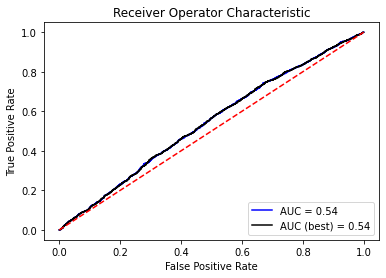

In [31]:
# Make an ROC curve plot.
plt.title('Receiver Operator Characteristic')
plt.plot(fpr, tpr, 'blue', 
         label = 'AUC = %0.2f'%auc)
plt.plot(best_fpr, best_tpr, 'black', 
         label = 'AUC (best) = %0.2f'%best_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

trained_accuracy_score = logistic_regression_model.score(X_train, y_train)
print("Accuracy on train data: " , trained_accuracy_score)

# Create regularization penalty space.
penalty = ['l1', 'l2']
# Create regularization constant space.
C = np.logspace(0, 10, 10)
print("Regularization constant: ", C)
# Create hyperparameter options dictionary.
hyperparameters = dict(C = C, penalty = penalty)
print(hyperparameters)


clf = GridSearchCV(linear_model.LogisticRegression(solver='saga',
                                                   max_iter = 5000),
                                                   #,n_jobs = -1), #<- function to optimize
                   hyperparameters,                   #<- grid search parameters
                   cv = 25,                           #<- 10-fold cv
                   verbose = 1)                       #<- no messages to show
# Fit CV grid search.
best_model = clf.fit(X_train, y_train)
best_model


## Decision Tree

In [32]:
X_train, X_test, y_train, y_test,y,X,df_subset = prep_data(df,subset_columns,'percent_change','dt')

False    7218
True     5742
Name: response, dtype: int64


/var/folders/bx/98s7l1y96p1f_2n55v3g_3dc0000gn/T/ipykernel_35733/2953734480.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['response'] = np.where(df_subset.copy()[target_col] > 0,sell,buy)


In [33]:
clf = tree.DecisionTreeClassifier()
clf_fit = clf.fit(X_train, y_train)

# Predict on X_test.
y_predict = clf_fit.predict(X_test)
y_predict[:20]

array([False, False, False,  True,  True, False, False, False,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True, False])

In [34]:
# Confusion matrix for first model.
cm_tree = confusion_matrix(y_test,y_predict)
# Accuracy score.
acc_score = accuracy_score(y_test, y_predict)
print(acc_score)

0.5174897119341564


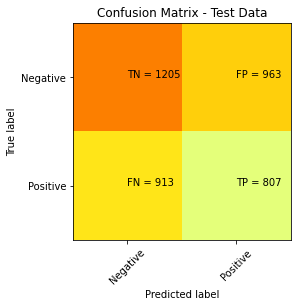

In [35]:
plt.clf()
plt.imshow(cm_tree, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j]) + " = " + str(cm_tree[i][j]))
plt.show()


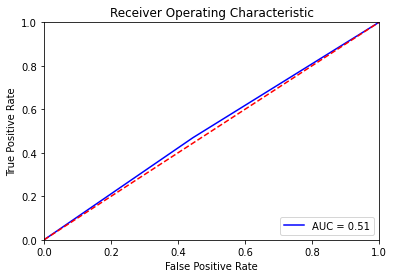

In [36]:
# Calculate metrics for ROC (fpr, tpr) and calculate AUC.
fpr, tpr, threshold = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC.
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [37]:
clf = tree.DecisionTreeClassifier()
print(clf)
clf_fit = clf.fit(X_train, y_train)
y_predict = clf_fit.predict(X_test)
print(y_predict[:20])
tree_accuracy_score = metrics.accuracy_score(y_test, y_predict)
print("Accuracy on test data: ", tree_accuracy_score)

DecisionTreeClassifier()
[False False False  True  True False False False  True False  True  True
 False  True  True  True False False  True False]
Accuracy on test data:  0.5185185185185185


In [38]:
acc_train_tree = clf_fit.score(X_train,
                                 y_train)
print ("Train Accuracy:", acc_train_tree)

Train Accuracy: 1.0


In [39]:
model_final = model_final.append({'metrics' : "accuracy" , 
                                  'values' : round(tree_accuracy_score,4),
                                  'model':'tree_all_variables' },ignore_index = True)
print(model_final)


    metrics  values               model
0  accuracy  0.5437               kNN_k
1  accuracy  0.4315    kNN_GridSearchCV
2  accuracy  1.0000       kNN_optimized
3  accuracy  0.5481            logistic
4  accuracy  0.5499      logistic_tuned
5  accuracy  0.5185  tree_all_variables


/var/folders/bx/98s7l1y96p1f_2n55v3g_3dc0000gn/T/ipykernel_35733/3823576582.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_final = model_final.append({'metrics' : "accuracy" ,


In [40]:
clf = tree.DecisionTreeClassifier()
cv_scores = cross_val_score(clf, X, y, cv = 10)
# Print each cv score (accuracy) and average them.
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))
mean = np.mean(cv_scores)
print("Optimal cv score is:", round(mean, 4))


[0.47916667 0.50308642 0.48765432 0.51774691 0.48611111 0.44135802
 0.50771605 0.54012346 0.46682099 0.50231481]
cv_scores mean:0.4932098765432099
Optimal cv score is: 0.4932


In [41]:
def optimal_parameter(values,test_results):
    best_test_value = max(test_results)
    best_test_index = test_results.index(best_test_value)
    best_value = values[best_test_index]
    return(best_value)


In [42]:
# Max depth:
max_depths = np.linspace(1, 128, 32, endpoint = True)
train_results = []
test_results = []

for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth = int(max_depth))
   dt.fit(X_train, y_train)
   
   train_pred = dt.predict(X_train)
   acc_train = accuracy_score(y_train, train_pred)
   
   # Add accuracy score to previous train results
   train_results.append(acc_train)
   y_pred = dt.predict(X_test)
   acc_test = accuracy_score(y_test, y_pred)
   # Add accuracy score to previous test results
   test_results.append(acc_test)
# Store optimal max_depth.
optimal_max_depth = optimal_parameter(max_depths,test_results)  


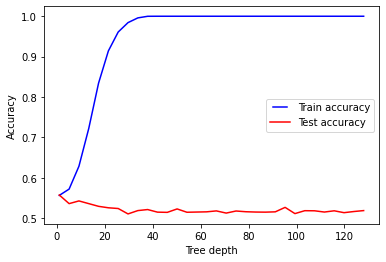

In [43]:
# Plot max depth over 1 - 32. 
line1, = plt.plot(max_depths, train_results, 'b', label= "Train accuracy")
line2, = plt.plot(max_depths, test_results, 'r', label= "Test accuracy")

plt.legend(handler_map={line1: HandlerLine2D(numpoints = 2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

In [44]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
   dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   acc_train = accuracy_score(y_train, train_pred)
   # Add accuracy score to previous train results
   train_results.append(acc_train)
   y_pred = dt.predict(X_test)
   acc_test = accuracy_score(y_test, y_pred)
   # Add accuracy score to previous test results
   test_results.append(acc_test)
# Store optimal max_depth.
optimal_min_samples_split = optimal_parameter(min_samples_splits,test_results) 


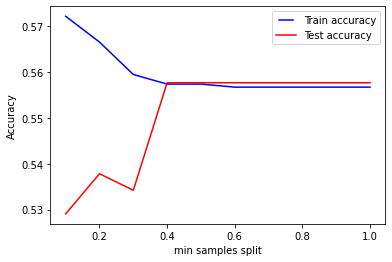

In [45]:
line1, = plt.plot(min_samples_splits, train_results, 'b', label = "Train accuracy")
line2, = plt.plot(min_samples_splits, test_results, 'r', label = "Test accuracy")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('min samples split')
plt.show()


In [46]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint = True)
train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
   dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   acc_train = accuracy_score(y_train, train_pred)
   # Add accuracy score to previous train results
   train_results.append(acc_train)
   y_pred = dt.predict(X_test)
   acc_test = accuracy_score(y_test, y_pred)
   # Add accuracy score to previous test results
   test_results.append(acc_test)
optimal_min_samples_leafs = optimal_parameter(min_samples_leafs,test_results)

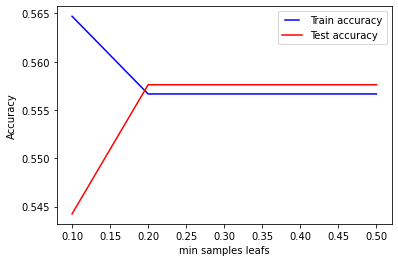

In [47]:
line1, = plt.plot(min_samples_leafs, train_results, 'b', label= "Train accuracy")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label= "Test accuracy")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('min samples leafs')
plt.show()

In [48]:
max_features = list(range(1,X.shape[1]))
train_results = []
test_results = []

for max_feature in max_features:
   dt = DecisionTreeClassifier(max_features=max_feature)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   acc_train = accuracy_score(y_train, train_pred)
   # Add accuracy score to previous train results
   train_results.append(acc_train)
   y_pred = dt.predict(X_test)
   acc_test = accuracy_score(y_test, y_pred)
   
   # Add accuracy score to previous test results
   test_results.append(acc_test)
optimal_max_features = optimal_parameter(max_features,test_results) 



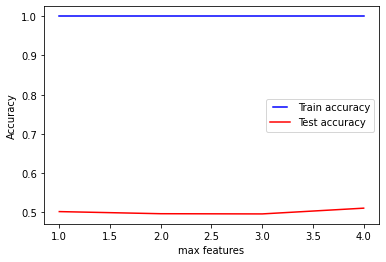

In [49]:
line1, = plt.plot(max_features, train_results, 'b', label= "Train accuracy")
line2, = plt.plot(max_features, test_results, 'r', label= "Test accuracy")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('max features')
plt.show()

In [50]:
print("The optimal max depth is:", optimal_max_depth)
print("The optimal min samples split is:", optimal_min_samples_split)
print("The optimal min samples leaf is:", optimal_min_samples_leafs)
print("The optimal max features is:", optimal_max_features)

The optimal max depth is: 1.0
The optimal min samples split is: 0.4
The optimal min samples leaf is: 0.2
The optimal max features is: 4


In [51]:
clf_optimized = tree.DecisionTreeClassifier(max_depth = int(optimal_max_depth),
                                            min_samples_split = optimal_min_samples_split,
                                            min_samples_leaf = optimal_min_samples_leafs,
                                            max_features = optimal_max_features)
                                            
# We can now see our optimized features where before they were just default:
print(clf_optimized)
clf_optimized_fit = clf_optimized.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=1, max_features=4, min_samples_leaf=0.2,
                       min_samples_split=0.4)


In [52]:
# Predict on X_test.
y_predict_optimized = clf_optimized_fit.predict(X_test)

# Get the accuracy score.
acc_score_tree_optimized = accuracy_score(y_test, y_predict_optimized)

print(acc_score_tree_optimized)


0.5576131687242798


In [53]:
# Compute accuracy using training data.
acc_train_tree_optimized = clf_optimized_fit.score(X_train,
                                         y_train)
                                         
print ("Train Accuracy:", acc_train_tree_optimized)

Train Accuracy: 0.556657848324515


In [54]:
# Add the optimized model to our dataframe.
model_final= model_final.append({'metrics' : "accuracy" , 
             'values' : round(acc_score_tree_optimized,4),
             'model':'tree_all_variables_optimized' },ignore_index = True)
print(model_final)

    metrics  values                         model
0  accuracy  0.5437                         kNN_k
1  accuracy  0.4315              kNN_GridSearchCV
2  accuracy  1.0000                 kNN_optimized
3  accuracy  0.5481                      logistic
4  accuracy  0.5499                logistic_tuned
5  accuracy  0.5185            tree_all_variables
6  accuracy  0.5576  tree_all_variables_optimized


/var/folders/bx/98s7l1y96p1f_2n55v3g_3dc0000gn/T/ipykernel_35733/4066245093.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_final= model_final.append({'metrics' : "accuracy" ,


In [55]:
model_final

,metrics,values,model
0,accuracy,0.5437,kNN_k
1,accuracy,0.4315,kNN_GridSearchCV
2,accuracy,1.0000,kNN_optimized
3,accuracy,0.5481,logistic
4,accuracy,0.5499,logistic_tuned
5,accuracy,0.5185,tree_all_variables
6,accuracy,0.5576,tree_all_variables_optimized
